In [1]:
#importing required libraries :
import pymongo
import json
import pprint

#connecting mongo client:
client = pymongo.MongoClient('mongodb://localhost:27017')

print(client.list_database_names()) #showing all database list of system:

#selecting database:
db = client['store_data']

['admin', 'config', 'local', 'store_data', 'test']


In [18]:
#creating collection import:
db.create_collection("import_data")

#creating collection export:
db.create_collection("export_data")

In [3]:
# db.get_collection("import_data").delete_many({})
# db.get_collection("export_data").delete_many({})

#for deleting all records from collections

In [4]:
#inserting export data into the collection export_data :

file=open("2018-2010_export.json")
file_export_data = json.load(file)

export_data = db.get_collection("export_data")
export_data.insert_many(file_export_data)

In [5]:
#inserting import data into the collection import_data :

file=open("2018-2010_import.json")
file_import_data = json.load(file)

import_data = db.get_collection("import_data")
import_data.insert_many(file_import_data)

In [6]:
#total no. of records in both collections :

print("import_data_records : ",import_data.count_documents({}))
print("export_data_records : ",export_data.count_documents({}))

import_data_records :  93095
export_data_records :  137023


In [14]:
#sample record
print("Sample import Record : \n")
pprint.pprint(import_data.find_one())
print("\nSample export Record : \n")
pprint.pprint(export_data.find_one())



Sample import Record : 

{'Commodity': 'PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECIFIED OR INCLUDED.',
 'HSCode': 5,
 '_id': ObjectId('614c9f6bc7e00f006046202d'),
 'country': 'AFGHANISTAN TIS',
 'value_million_dollar': 0,
 'year': 2018}

Sample export Record : 

{'Commodity': 'MEAT AND EDIBLE MEAT OFFAL.',
 'HSCode': 2,
 '_id': ObjectId('614c9f5ec7e00f00604408ee'),
 'country': 'AFGHANISTAN TIS',
 'value_million_dollar': 0.18,
 'year': 2018}


# counting total no.of  commodities and countries (2010-2018)

In [13]:
print("Total imported commodities : ",len(import_data.distinct("Commodity")))
print("Total countries from where we imported : ",len(import_data.distinct("country")))

print("\nTotal exported commodities : ",len(export_data.distinct("Commodity")))
print("Total countries where we exported : ",len(export_data.distinct("country")))

total_cost_import=import_data.aggregate([ { 
    "$group": { 
        "_id": 'null', 
        "total": { 
            "$sum": "$value_million_dollar" 
        } 
    } 
} ] )
print()
total_cost_export=export_data.aggregate([ { 
    "$group": { 
        "_id": 'null', 
        "total": { 
            "$sum": "$value_million_dollar" 
        } 
    } 
} ] )
print()
for i in total_cost_import:
    print("Total import cost : ",i['total']," m$")
    print("average import cost : ",i['total']/import_data.count_documents({})," m$")
print()
for i in total_cost_export:
    print("Total export gain : ",i['total']," m$")
    print("average export gain : ",i['total']/export_data.count_documents({})," m$")

Total imported commodities :  98
Total countries from where we imported :  242

Total exported commodities :  98
Total countries where we exported :  248


Total import cost :  5004202.27  m$
average import cost :  53.753716848380684  m$

Total export cost :  2652519.47  m$
average export cost :  19.358206067594494  m$



# Calculating Quantity of each commodity :

In [31]:
# import matplotlib.pyplot as plt

total_import_each_commodity = import_data.aggregate(
    [{"$group" : 
      {"_id":"$Commodity",
       "Total":{"$sum":1}
      }},{ "$sort" : { "Total" : -1 } }
    ])

imported_commodity=[]
imported_cost=[]

l1=0
for i in total_import_each_commodity:
    imported_commodity.append(i['_id'])
    imported_cost.append(i['Total'])
    l1+=1
    

print(" Top-3 most imported commodity :\n") 
print(imported_commodity[0]," quantity :=> ",imported_cost[0])
print(imported_commodity[1]," quantity :=> ",imported_cost[1])
print(imported_commodity[2]," quantity :=> ",imported_cost[2])

print("\n Top-3 very less imported commodity : \n") 
print(imported_commodity[l1-1]," quantity :=> ",imported_cost[l1-1])
print(imported_commodity[l1-2]," quantity :=> ",imported_cost[l1-2])
print(imported_commodity[l1-3]," quantity :=> ",imported_cost[l1-3])
    
# plt.figure(figsize=(50, 10)) 
# plt.title("Import bar graph")
# plt.bar(imported_commodity[0:3], imported_cost[0:3],width=0.1)



#export data starts....
total_export_each_commodity = export_data.aggregate(
    [{"$group" : 
      {"_id":"$Commodity",
       "Total":{"$sum":1}
      }},{ "$sort" : { "Total" : -1 } }
    ])

exported_commodity=[]
exported_cost=[]


l2=0
for i in total_export_each_commodity:
    exported_commodity.append(i['_id'])
    exported_cost.append(i['Total'])
    l2+=1

print("\nTop-3 most exported commodity :\n") 
print(exported_commodity[0]," quantity :=> ",exported_cost[0])
print(exported_commodity[1]," quantity :=> ",exported_cost[1])
print(exported_commodity[2]," quantity :=> ",exported_cost[2])

print("\n Top-3 very less exported commodity : \n") 
print(exported_commodity[l1-1]," quantity :=> ",exported_cost[l2-1])
print(exported_commodity[l1-2]," quantity :=> ",exported_cost[l2-2])
print(exported_commodity[l1-3]," quantity :=> ",exported_cost[l2-3])
        
# plt.figure(figsize=(50, 10)) 
# plt.title("Export bar graph")
# plt.bar(exported_commodity[0:3], exported_cost[0:3],width=0.1)

 Top-3 most imported commodity :

ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS THEREOF; SOUND RECORDERS AND REPRODUCERS, TELEVISION IMAGE AND SOUND RECORDERS AND REPRODUCERS,AND PARTS.  quantity :=>  2174
NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF.  quantity :=>  2090
PLASTIC AND ARTICLES THEREOF.  quantity :=>  1866

 Top-3 very less imported commodity : 

MEAT AND EDIBLE MEAT OFFAL.  quantity :=>  194
EXPLOSIVES; PYROTECHNIC PRODUCTS; MATCHES; PYROPHORIC ALLOYS; CERTAIN COMBUSTIBLE PREPARATIONS.  quantity :=>  250
VEGETABLE PLAITING MATERIALS; VEGETABLE PRODUCTS NOT ELSEWHERE SPECIFIED OR INCLUDED.  quantity :=>  271

Top-3 most exported commodity :

ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS THEREOF; SOUND RECORDERS AND REPRODUCERS, TELEVISION IMAGE AND SOUND RECORDERS AND REPRODUCERS,AND PARTS.  quantity :=>  1963
NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF.  quantity :=>  1945
OPTICAL, PHOTOGRAPHIC CINEMATOGRAP

# count year-wise import_export cost  


Import cost year wise : 

{'_id': 2018, 'value': 1028142.66}
{'_id': 2017, 'value': 931148.04}
{'_id': 2012, 'value': 490730.07}
{'_id': 2011, 'value': 489311.81}
{'_id': 2013, 'value': 450192.99}
{'_id': 2014, 'value': 448026.63}
{'_id': 2015, 'value': 412537.53}
{'_id': 2016, 'value': 384350.29}
{'_id': 2010, 'value': 369762.25}

Export gain year wise : 

{'_id': 2018, 'value': 330058.64}
{'_id': 2013, 'value': 314388.61}
{'_id': 2014, 'value': 310321.02}
{'_id': 2011, 'value': 305948.28}
{'_id': 2017, 'value': 303507.85}
{'_id': 2012, 'value': 300384.32}
{'_id': 2016, 'value': 275835.27}
{'_id': 2015, 'value': 262274.3}
{'_id': 2010, 'value': 249801.18}

Yearwise export-to-import ratio : 
 
2018  ratio :  0.32102416604326095
2013  ratio :  0.3376354741615522
2014  ratio :  0.6323660174319459
2011  ratio :  0.6252624068076347
2017  ratio :  0.6741727586651227
2012  ratio :  0.6704608607751731
2016  ratio :  0.6686307303968199
2015  ratio :  0.6823835101048057
2010  ratio :  0.6755724

<BarContainer object of 9 artists>

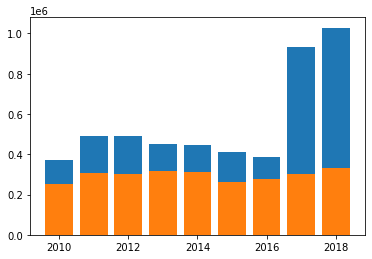

In [46]:
import matplotlib.pyplot as plt
yearwise_import_cost = import_data.aggregate(
    [{"$group" : 
      {"_id":"$year",
       "value":{"$sum":"$value_million_dollar"}
      }},{ "$sort" : { "value" : -1 } }
    ])
import_years=[]
import_cost=[]
print("Import cost year wise : \n")
for i in yearwise_import_cost:
    import_years.append(i['_id'])
    import_cost.append(i['value'])
    print(i)

#export data starts ...

yearwise_export_gain = export_data.aggregate(
    [{"$group" : 
      {"_id":"$year",
       "value":{"$sum":"$value_million_dollar"}
      }},{ "$sort" : { "value" : -1 } }
    ])

export_years=[]
export_gain=[]

print("\nExport gain year wise : \n")
for i in yearwise_export_gain:
    export_years.append(i['_id'])
    export_gain.append(i['value'])
    print(i)
    


print("\nYearwise export-to-import ratio : \n ")
export_import_ratio = dict()
for i in range(len(export_years)):
    export_import_ratio[export_years[i]]=(export_gain[i]/import_cost[i])
    print(export_years[i]," ratio : ",export_import_ratio[export_years[i]])
    
key_max = max(export_import_ratio.keys(), key=(lambda k: export_import_ratio[k]))
key_min = min(export_import_ratio.keys(), key=(lambda k: export_import_ratio[k]))

print("\nLowest terms of trade was in year : ",key_min)    
print("\nHighest terms of trade was in year : ",key_max)

plt.bar(import_years, import_cost)
plt.bar(export_years, export_gain)

# calculate country-wise import_export cost  

Top-3 countries from where we Import : 

Country :  CHINA P RP , value :  678877.15
Country :  U ARAB EMTS , value :  307810.15
Country :  SAUDI ARAB , value :  292104.09

Top-3 countries where we export : 

Country :  U S A , value :  360609.57
Country :  U ARAB EMTS , value :  289374.88
Country :  CHINA P RP , value :  121806.0


<BarContainer object of 3 artists>

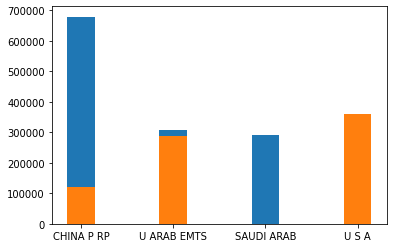

In [64]:
import matplotlib.pyplot as plt
countrywise_import_cost = import_data.aggregate(
    [{"$group" : 
      {"_id":"$country",
       "value":{"$sum":"$value_million_dollar"}
      }},{ "$sort" : { "value" : -1 } }
    ])

countries_import=[]
cost2_import=[]

print("Top-3 countries from where we Import : \n")
for i in countrywise_import_cost:
    countries_import.append(i['_id'])
    cost2_import.append(i['value'])
    if len(cost2_import)<=3:
        print("Country : ",i['_id'],", value : ",i['value'])
  

countrywise_export_gain = export_data.aggregate(
    [{"$group" : 
      {"_id":"$country",
       "value":{"$sum":"$value_million_dollar"}
      }},{ "$sort" : { "value" : -1 } }
    ])

countries_export=[]
cost2_export=[]

print("\nTop-3 countries where we export : \n")
for i in countrywise_export_gain:
    countries_export.append(i['_id'])
    cost2_export.append(i['value'])
    if len(cost2_export)<=3:
        print("Country : ",i['_id'],", value : ",i['value'])
    
   
plt.bar(countries_import[0:3], cost2_import[0:3], width=0.3)
plt.bar(countries_export[0:3], cost2_export[0:3], width=0.3)

# counting top-3 most expansive import

Commodity :  MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THEIR DISTILLATION; BITUMINOUS SUBSTANCES; MINERAL WAXES. , value :   1618556.68
Commodity :  NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRECIOUS STONES,PRE.METALS,CLAD WITH PRE.METAL AND ARTCLS THEREOF;IMIT.JEWLRY;COIN. , value :   770826.15
Commodity :  ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS THEREOF; SOUND RECORDERS AND REPRODUCERS, TELEVISION IMAGE AND SOUND RECORDERS AND REPRODUCERS,AND PARTS. , value :   427570.66


<BarContainer object of 3 artists>

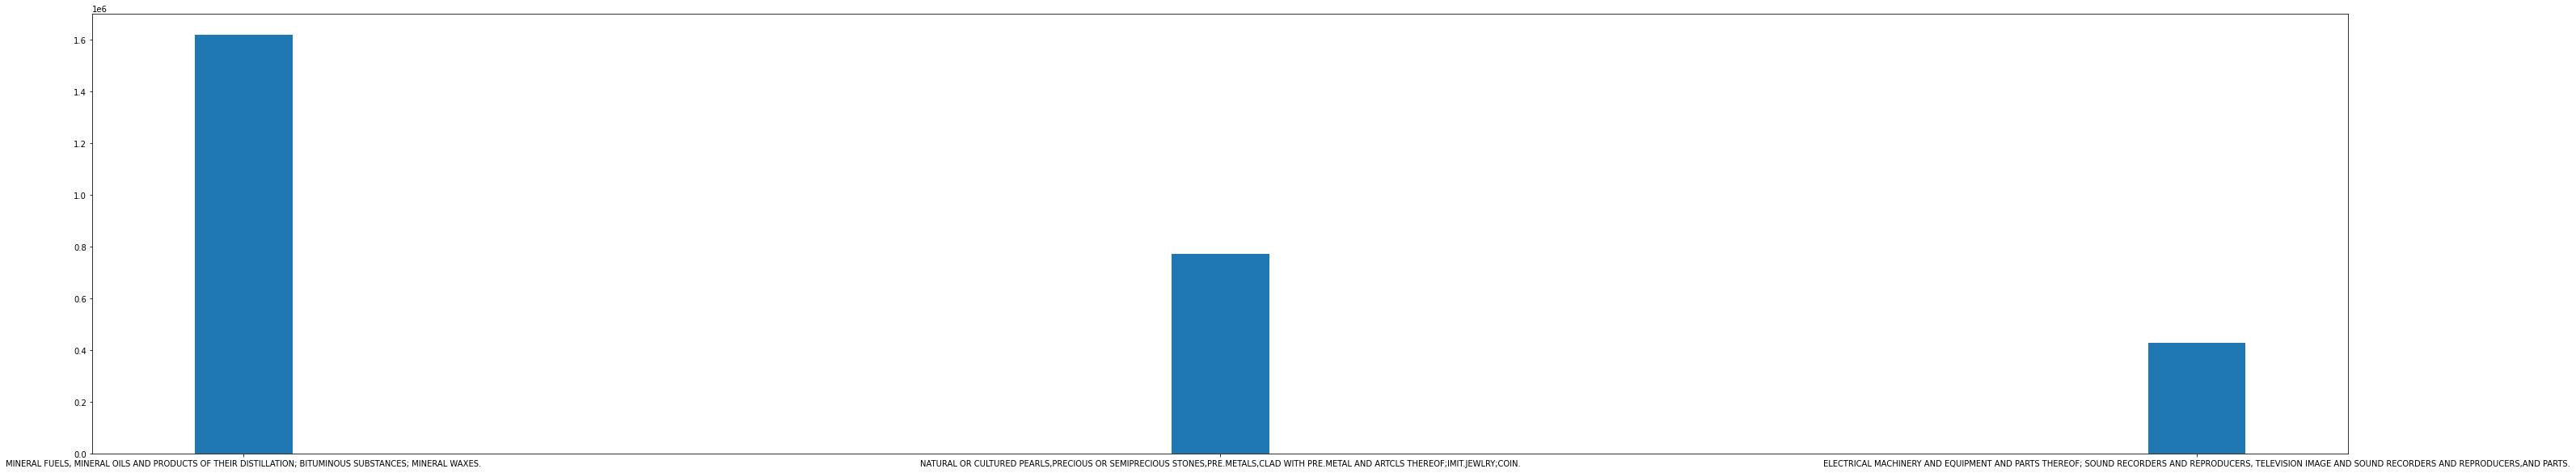

In [92]:
commoditywise_cost = import_data.aggregate(
    [{"$group" : 
      {"_id":"$Commodity",
       "value":{"$sum":"$value_million_dollar"}
      }},{ "$sort" : { "value" : -1 } }
    ])
commodities=[]
cost3=[]
for i in commoditywise_cost:
    commodities.append(i['_id'])
    cost3.append(i['value'])
    if len(cost3)<=3:
        print("Commodity : ",i['_id'], ", value :  ",i['value'])
    
plt.figure(figsize=(50, 10))    
plt.bar(commodities[0:3], cost3[0:3], width=0.1)

# counting top-3 most profitable exports

Commodity :  MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THEIR DISTILLATION; BITUMINOUS SUBSTANCES; MINERAL WAXES. , value :  434594.81
Commodity :  NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRECIOUS STONES,PRE.METALS,CLAD WITH PRE.METAL AND ARTCLS THEREOF;IMIT.JEWLRY;COIN. , value :  383341.86
Commodity :  VEHICLES OTHER THAN RAILWAY OR TRAMWAY ROLLING STOCK, AND PARTS AND ACCESSORIES THEREOF. , value :  124502.75


<BarContainer object of 3 artists>

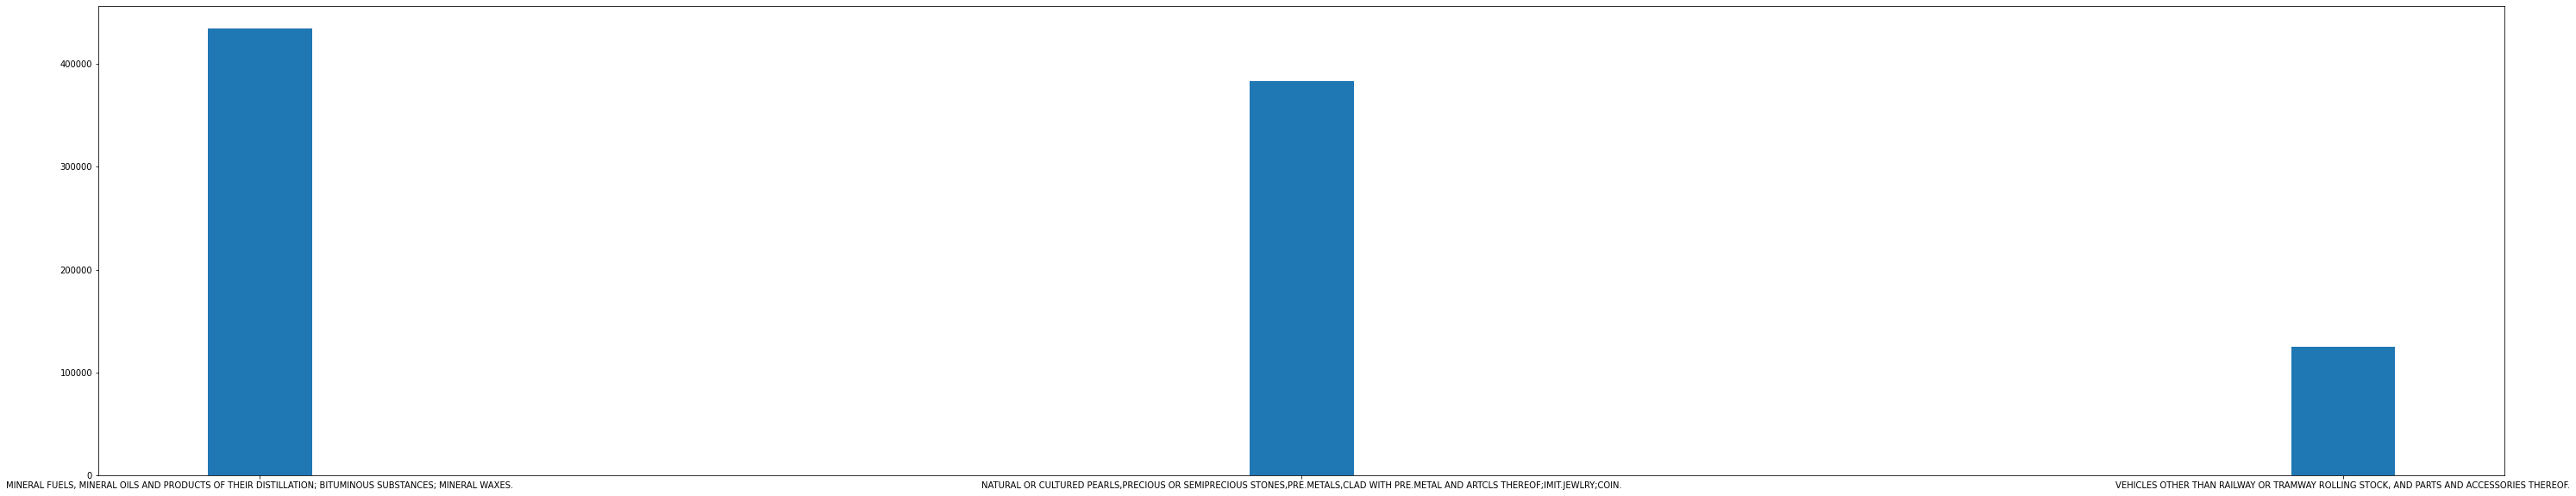

In [68]:
commoditywise_export_cost = export_data.aggregate(
    [{"$group" : 
      {"_id":"$Commodity",
       "value":{"$sum":"$value_million_dollar"}
      }},{ "$sort" : { "value" : -1 } }
    ])
commodities_export=[]
cost3_export=[]
for i in commoditywise_export_cost:
    commodities_export.append(i['_id'])
    cost3_export.append(i['value'])
    if len(cost3_export)<=3:
        print("Commodity : ",i['_id'],", value : ",i['value'])
    
plt.figure(figsize=(50, 10))  
plt.bar(commodities_export[0:3], cost3_export[0:3], width=0.1)

# Analyzing Year 2015 as it has highest terms of trade among 8 years